## Perform EDA on the S&P 500 stocks

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('../../data/sp500.csv', index_col=0, parse_dates=True)

In [3]:
def plot_series(data: pd.DataFrame, col):
    plt.figure(figsize=(15, 10))
    plt.plot(data.index, data[col], label=col)
    plt.title(f'{col}')
    plt.xlabel('Date')
    plt.ylabel(col)
    plt.legend()
    plt.grid()
    plt.show()

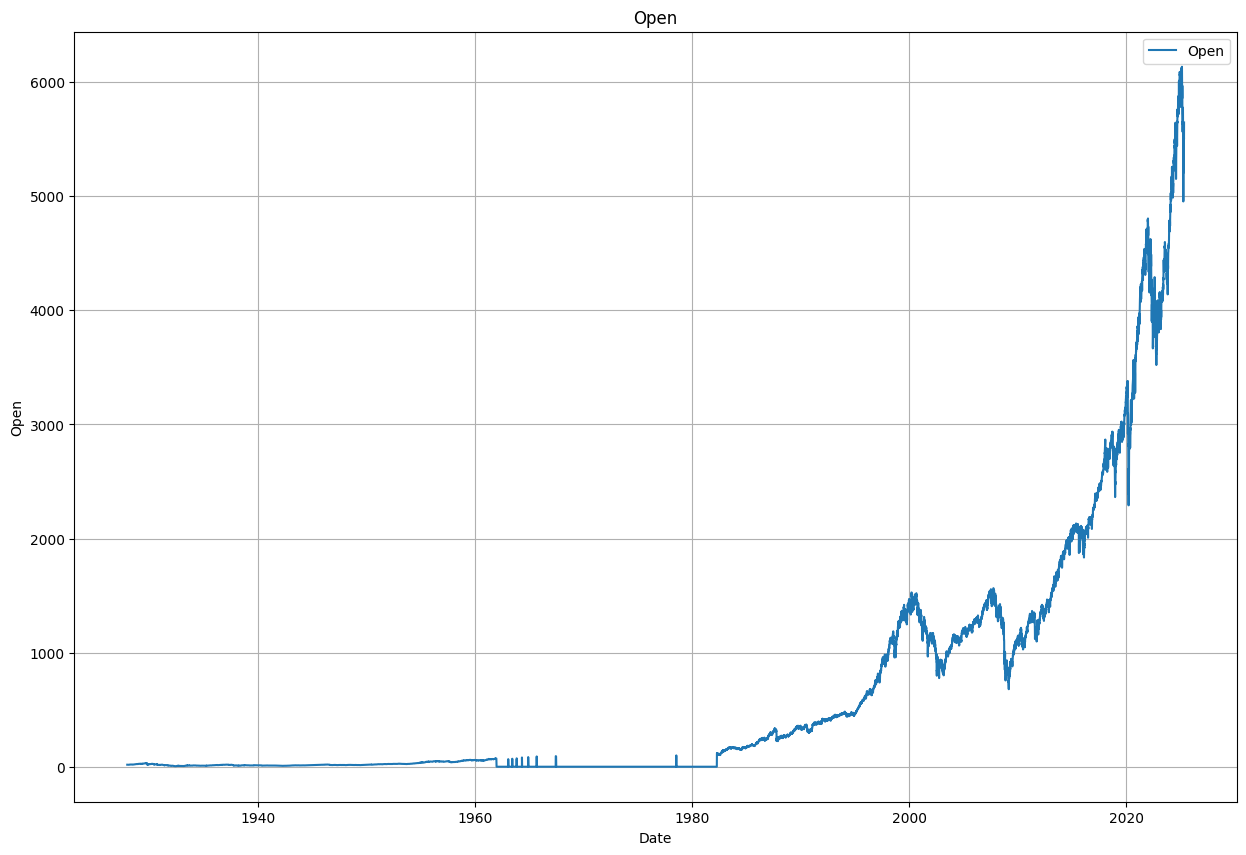

In [4]:
plot_series(data, 'Open')

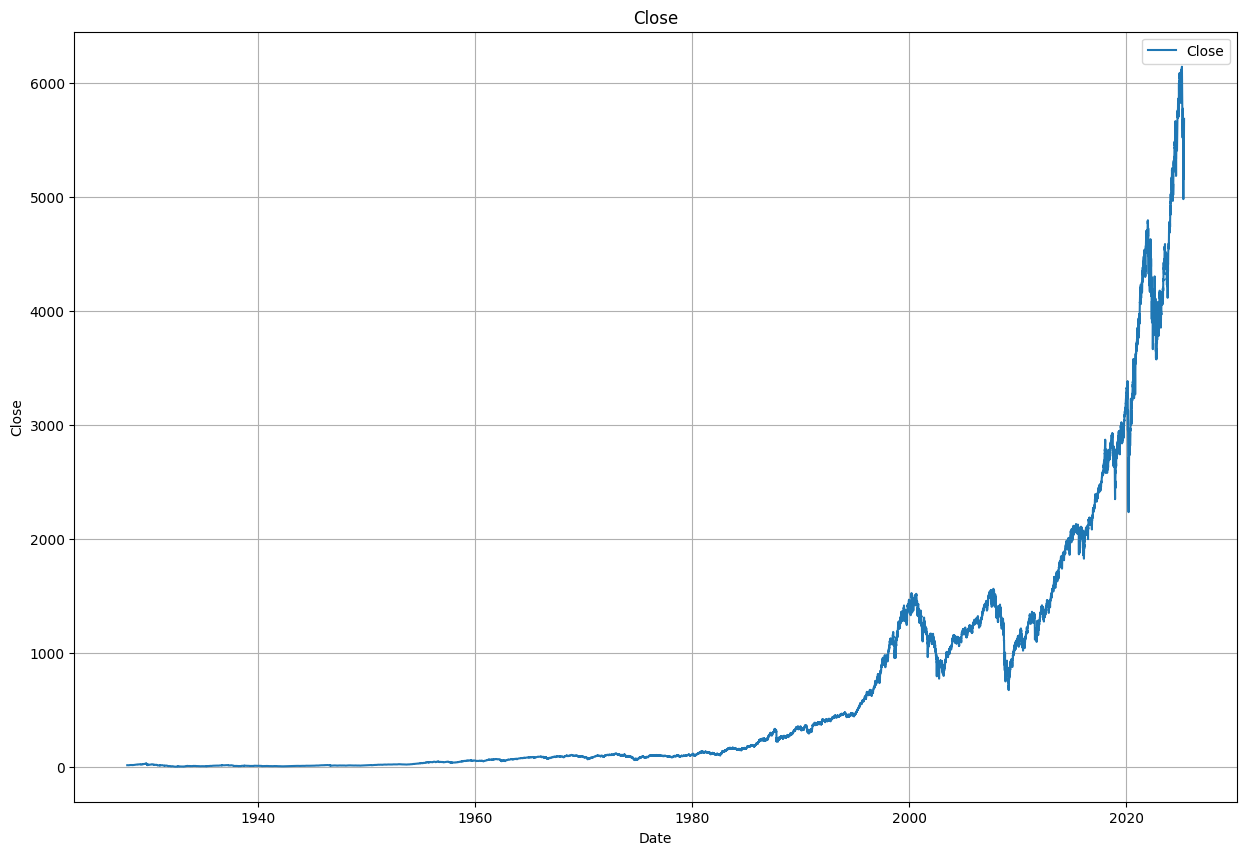

In [5]:
plot_series(data, 'Close')

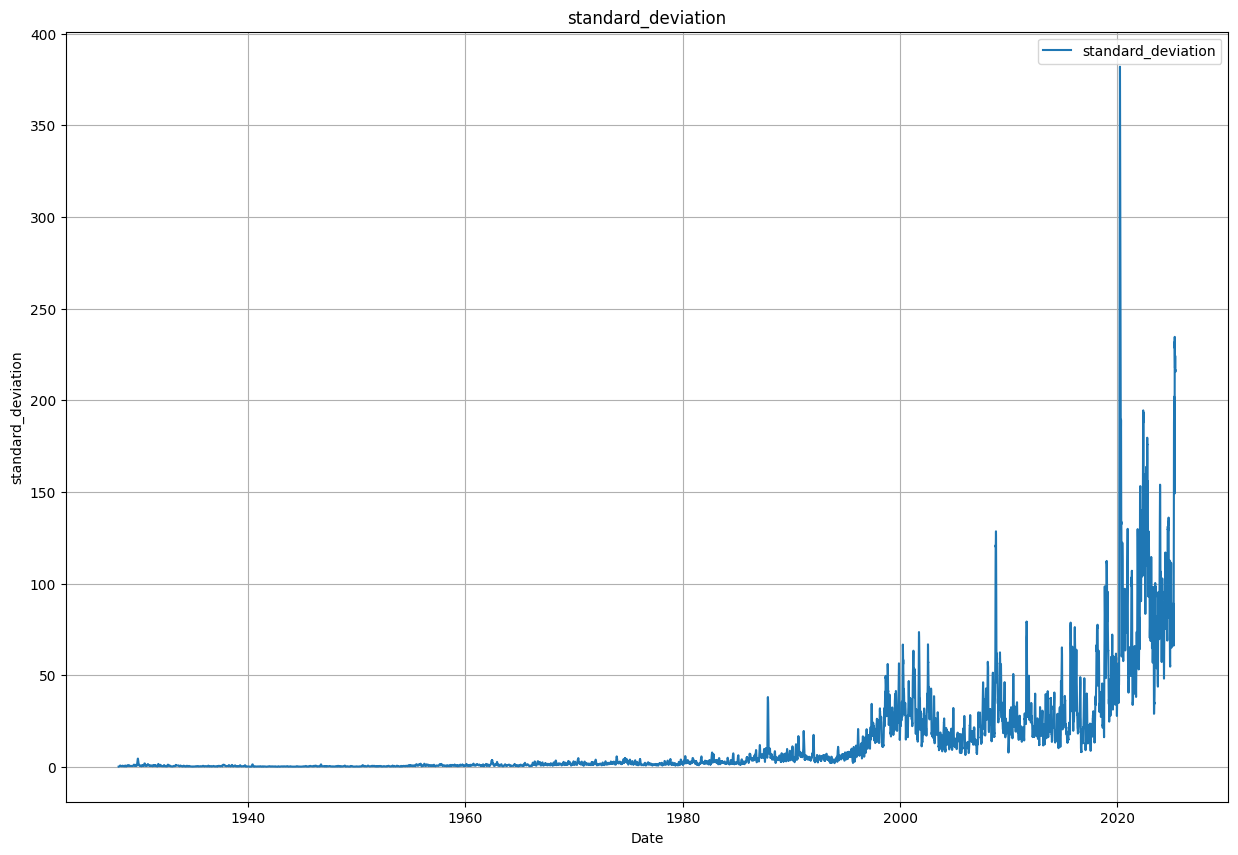

In [6]:
data['standard_deviation'] = data['Close'].rolling(30).std()
plot_series(data, 'standard_deviation')

We can see that:

1. Standard deviation in S&P 500 companies increased over time, and spiked during Covid (2020)
2. There was much less price movement before the 1980s than after. This could be due to low levels of liquidity in the stock market previously.
    - We will focus on modelling prices after 1980, at least for now.

In [7]:
data = data[(data['Open'] != 0) & (data.index > '1985-01-01')]

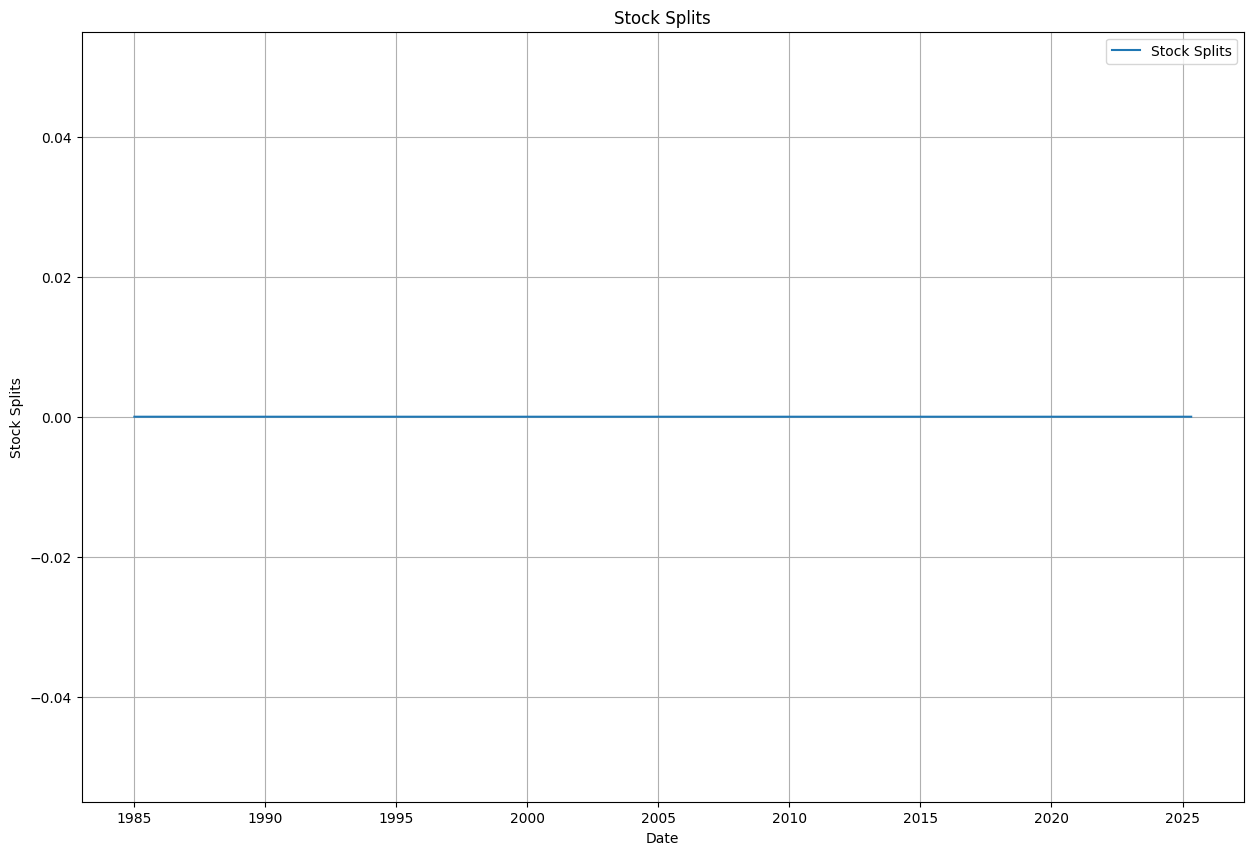

In [ ]:
# stock splits over time
plot_series(data, 'Stock Splits')

No stock splits at all since 1985, which is normal for an index.

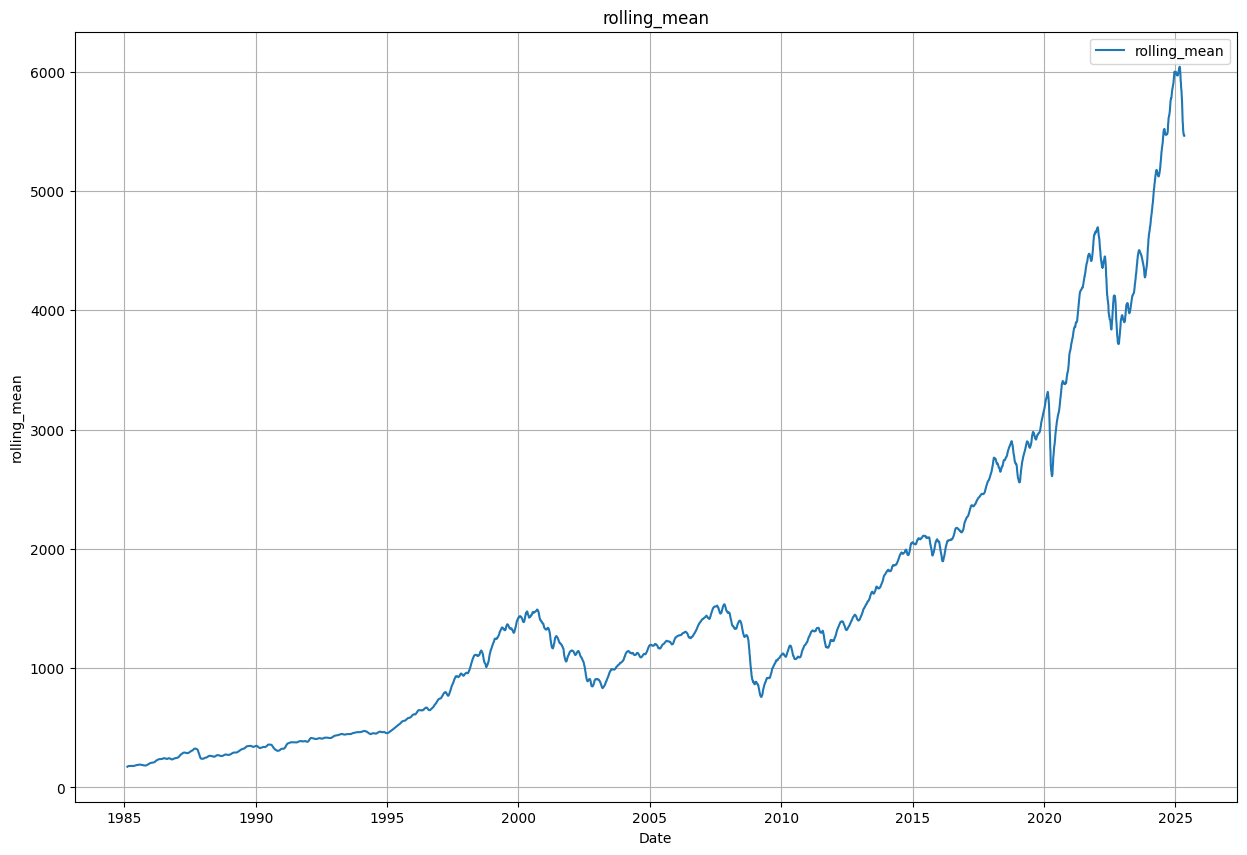

In [13]:
# plot rolling mean

data['rolling_mean'] = data['Close'].rolling(30).mean()
plot_series(data, 'rolling_mean')